# KNN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 데이터 scaling(적용 가능. 연습에서는 제외)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 예측/회귀 KNN
from sklearn.neighbors import KNeighborsRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [2]:
df_raw = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/체질검사.csv', engine='python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [3]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis=1, inplace=False)

In [4]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("train data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
train data X size : (76, 13)
test data Y size : (76,)


In [6]:
# 모델 생성 : KNeighborsRegressor
knn_uncustomized = KNeighborsRegressor()
knn_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set : {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.740
Score on test set : 0.539


In [7]:
knn_uncustomized

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [8]:
# 이웃 수 증가에 따른 설명력 변화
train_score=[]
test_score =[]
# 최대 이웃 수 : 1 ~ 15
para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    # 이웃 1~15개까지 지정하여 모델 생성
    knn = KNeighborsRegressor(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))
    
df_score_knn = pd.DataFrame()
df_score_knn['Neighbors'] = para_n_neighbors
df_score_knn['TrainScore'] = train_score
df_score_knn['TestScore'] = test_score

In [9]:
df_score_knn.round(3)

,Neighbors,TrainScore,TestScore
0,1,1.000,0.260
1,2,0.841,0.416
2,3,0.793,0.468
3,4,0.755,0.512
4,5,0.740,0.539
5,6,0.720,0.515
6,7,0.700,0.499
7,8,0.687,0.516
8,9,0.664,0.518
9,10,0.646,0.524


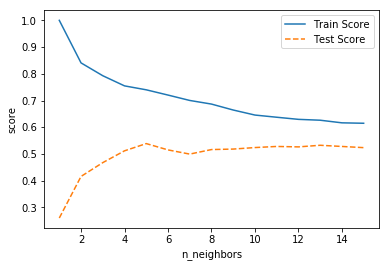

In [10]:
plt.plot(para_n_neighbors, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_neighbors, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [12]:
# 가중치별 이웃 수 증가에 따른 설명력 변화
# train 및 test 설명력 결과 저장
train_score=[]
test_score =[]
# 이웃 수 : 1~10
para_n_neighbors = [i for i in range(1, 11)] *2
# 가중치(uniform, distance) 
para_weights = (["uniform"] * 10) + (["distance"] * 10)
# zip(list1, list2, ...)을 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop = v_n_neighbors = prar_n_neighbors[0], v_weights = para_weights[0]
for (v_n_neighbors, v_weights) in zip (para_n_neighbors, para_weights):
    knn = KNeighborsRegressor(n_neighbors=v_n_neighbors, weights=v_weights)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))
    
df_score_weight = pd.DataFrame()
df_score_weight['Neighbors'] = para_n_neighbors
df_score_weight['Weights'] = para_weights
df_score_weight['TrainScore'] = train_score
df_score_weight['TestScore'] = test_score

In [14]:
df_score_weight_pivot = df_score_weight.pivot(index = 'Neighbors', columns='Weights', values=['TrainScore', 'TestScore'])
df_score_weight_pivot.head()

TrainScore           TestScore          
Weights     distance   uniform  distance   uniform
Neighbors                                         
1                1.0  1.000000  0.260301  0.260301
2                1.0  0.840753  0.431951  0.415927
3                1.0  0.792742  0.487390  0.467537
4                1.0  0.754752  0.527435  0.511723
5                1.0  0.740025  0.550285  0.538785

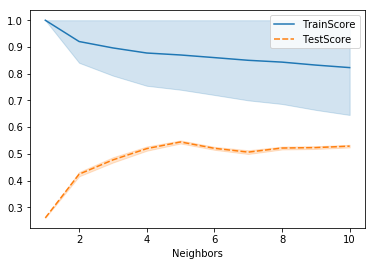

In [15]:
sns.lineplot(data = df_score_weight_pivot)

In [16]:
# 거리 계산 방법별 이웃 수 증가에 따른 설명력 변화
# train 및 test 설명력 결과 저장
train_score=[]
test_score =[]
# 이웃 수 : 1~10
para_n_neighbors = [i for i in range(1, 11)] *3
# 거리 계산 방법(minkowski, euclidean, manhattan)
para_metric = ['minkowski'] * 10 + ['euclidean'] * 10 + ['manhattan'] * 10

for (v_n_neighbors, v_metric) in zip (para_n_neighbors, para_metric):
    knn = KNeighborsRegressor(n_neighbors=v_n_neighbors, weights='uniform', metric=v_metric)
    knn.fit(df_train_x, df_train_y)
    train_score.append(knn.score(df_train_x, df_train_y))
    test_score.append(knn.score(df_test_x, df_test_y))
    
df_score_metric = pd.DataFrame()
df_score_metric['Neighbors'] = para_n_neighbors
df_score_metric['Metric'] = para_metric
df_score_metric['TrainScore'] = train_score
df_score_metric['TestScore'] = test_score

In [17]:
df_score_metric.round(3)

,Neighbors,Metric,TrainScore,TestScore
0,1,minkowski,1.000,0.260
1,2,minkowski,0.841,0.416
2,3,minkowski,0.793,0.468
3,4,minkowski,0.755,0.512
4,5,minkowski,0.740,0.539
5,6,minkowski,0.720,0.515
6,7,minkowski,0.700,0.499
7,8,minkowski,0.687,0.516
8,9,minkowski,0.664,0.518
9,10,minkowski,0.646,0.524


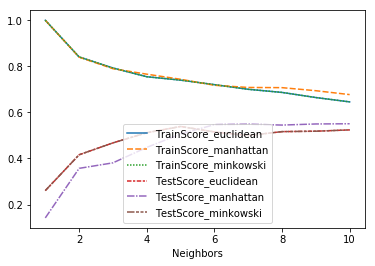

In [18]:
# 모델 설명력 그래프 확인 : euclidean
df_score_metric_pivot = df_score_metric.pivot(index='Neighbors', columns='Metric', values=['TrainScore', 'TestScore'])
level0 = df_score_metric_pivot.columns.get_level_values(0)
level1 = df_score_metric_pivot.columns.get_level_values(1)
df_score_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data=df_score_metric_pivot)

In [20]:
knn_final = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='euclidean')
knn_final.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(knn_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(knn_final.score(df_test_x, df_test_y)))

Score on training set : 0.740
Score on test set : 0.539


In [22]:
estimator = KNeighborsRegressor()
# 구하고자 하는 parameter의 범위
param_grid = {'n_neighbors' : para_n_neighbors, 'weights' : para_weights, 'metric' : para_metric}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)
print("best estimator model : \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model : 
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=None, n_neighbors=6, p=2,
          weights='distance')

best parameter : 
{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}

best score : 
0.619


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
dfd_raw = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/DIABETES.csv', engine='python')
dfd_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [27]:
dfd_raw_y = dfd_raw['Y']
dfd_raw_x = dfd_raw.drop('Y', axis=1, inplace=False)

In [28]:
dfd_train_x, dfd_test_x, dfd_train_y, dfd_test_y = train_test_split(dfd_raw_x, dfd_raw_y, test_size=0.3, random_state=123)
print("train data X size : {}".format(dfd_train_x.shape))
print("train data Y size : {}".format(dfd_train_y.shape))
print("train data X size : {}".format(dfd_test_x.shape))
print("test data Y size : {}".format(dfd_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
train data X size : (133, 10)
test data Y size : (133,)


In [29]:
# 모델 생성 : KNeighborsRegressor
knn_uncustomized = KNeighborsRegressor()
knn_uncustomized.fit(dfd_train_x, dfd_train_y)
# Train 데이터 설명력
print("Score on training set : {:.3f}".format(knn_uncustomized.score(dfd_train_x, dfd_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(knn_uncustomized.score(dfd_test_x, dfd_test_y)))

Score on training set : 0.461
Score on test set : 0.200


In [30]:
knn_uncustomized

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [31]:
# 이웃 수 증가에 따른 설명력 변화
train_score=[]
test_score =[]
# 최대 이웃 수 : 1 ~ 15
para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    # 이웃 1~15개까지 지정하여 모델 생성
    knn = KNeighborsRegressor(n_neighbors=v_n_neighbors)
    knn.fit(dfd_train_x, dfd_train_y)
    train_score.append(knn.score(dfd_train_x, dfd_train_y))
    test_score.append(knn.score(dfd_test_x, dfd_test_y))
    
df_score_knn = pd.DataFrame()
df_score_knn['Neighbors'] = para_n_neighbors
df_score_knn['TrainScore'] = train_score
df_score_knn['TestScore'] = test_score

In [32]:
df_score_knn.round(3)

,Neighbors,TrainScore,TestScore
0,1,1.000,-0.492
1,2,0.684,0.050
2,3,0.546,0.106
3,4,0.483,0.173
4,5,0.461,0.200
5,6,0.439,0.239
6,7,0.427,0.280
7,8,0.417,0.288
8,9,0.408,0.289
9,10,0.396,0.294


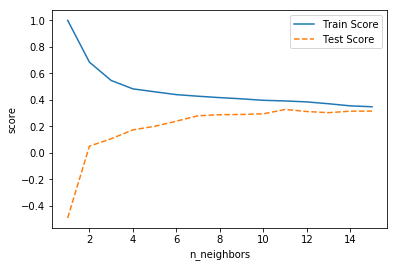

In [33]:
plt.plot(para_n_neighbors, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_neighbors, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [34]:
# 가중치별 이웃 수 증가에 따른 설명력 변화
# train 및 test 설명력 결과 저장
train_score=[]
test_score =[]
# 이웃 수 : 1~10
para_n_neighbors = [i for i in range(1, 11)] *2
# 가중치(uniform, distance) 
para_weights = (["uniform"] * 10) + (["distance"] * 10)
# zip(list1, list2, ...)을 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop = v_n_neighbors = prar_n_neighbors[0], v_weights = para_weights[0]
for (v_n_neighbors, v_weights) in zip (para_n_neighbors, para_weights):
    knn = KNeighborsRegressor(n_neighbors=v_n_neighbors, weights=v_weights)
    knn.fit(dfd_train_x, dfd_train_y)
    train_score.append(knn.score(dfd_train_x, dfd_train_y))
    test_score.append(knn.score(dfd_test_x, dfd_test_y))
    
df_score_weight = pd.DataFrame()
df_score_weight['Neighbors'] = para_n_neighbors
df_score_weight['Weights'] = para_weights
df_score_weight['TrainScore'] = train_score
df_score_weight['TestScore'] = test_score

In [36]:
df_score_weight_pivot = df_score_weight.pivot(index = 'Neighbors', columns='Weights', values=['TrainScore', 'TestScore'])
df_score_weight_pivot.head()

TrainScore           TestScore          
Weights     distance   uniform  distance   uniform
Neighbors                                         
1                1.0  1.000000 -0.492129 -0.492129
2                1.0  0.684488  0.036184  0.050490
3                1.0  0.546207  0.103609  0.106032
4                1.0  0.482734  0.165998  0.173387
5                1.0  0.460784  0.196945  0.199943

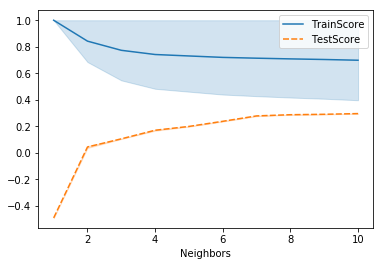

In [37]:
sns.lineplot(data = df_score_weight_pivot)

In [38]:
# 거리 계산 방법별 이웃 수 증가에 따른 설명력 변화
# train 및 test 설명력 결과 저장
train_score=[]
test_score =[]
# 이웃 수 : 1~10
para_n_neighbors = [i for i in range(1, 11)] *3
# 거리 계산 방법(minkowski, euclidean, manhattan)
para_metric = ['minkowski'] * 10 + ['euclidean'] * 10 + ['manhattan'] * 10

for (v_n_neighbors, v_metric) in zip (para_n_neighbors, para_metric):
    knn = KNeighborsRegressor(n_neighbors=v_n_neighbors, weights='uniform', metric=v_metric)
    knn.fit(dfd_train_x, dfd_train_y)
    train_score.append(knn.score(dfd_train_x, dfd_train_y))
    test_score.append(knn.score(dfd_test_x, dfd_test_y))
    
df_score_metric = pd.DataFrame()
df_score_metric['Neighbors'] = para_n_neighbors
df_score_metric['Metric'] = para_metric
df_score_metric['TrainScore'] = train_score
df_score_metric['TestScore'] = test_score

In [39]:
df_score_metric.round(3)

,Neighbors,Metric,TrainScore,TestScore
0,1,minkowski,1.000,-0.492
1,2,minkowski,0.684,0.050
2,3,minkowski,0.546,0.106
3,4,minkowski,0.483,0.173
4,5,minkowski,0.461,0.200
5,6,minkowski,0.439,0.239
6,7,minkowski,0.427,0.280
7,8,minkowski,0.417,0.288
8,9,minkowski,0.408,0.289
9,10,minkowski,0.396,0.294


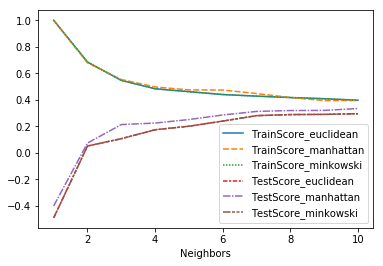

In [40]:
# 모델 설명력 그래프 확인 : euclidean
df_score_metric_pivot = df_score_metric.pivot(index='Neighbors', columns='Metric', values=['TrainScore', 'TestScore'])
level0 = df_score_metric_pivot.columns.get_level_values(0)
level1 = df_score_metric_pivot.columns.get_level_values(1)
df_score_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data=df_score_metric_pivot)

In [42]:
knn_final = KNeighborsRegressor(n_neighbors=7, weights='uniform', metric='manhattan')
knn_final.fit(dfd_train_x, dfd_train_y)

print("Score on training set : {:.3f}".format(knn_final.score(dfd_train_x, dfd_train_y)))
print("Score on test set : {:.3f}".format(knn_final.score(dfd_test_x, dfd_test_y)))

Score on training set : 0.447
Score on test set : 0.312
